# CONVOLUTION NEURAL NETWORKS
Notebook created by: Shantanu Dusane

# Part 1: Convolutional Neural Network

###  Importing packages

In [1]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K
from keras.preprocessing import image
from keras.models import Model
# import timeit

import warnings
warnings.filterwarnings('ignore')

### Preparing Dataset

In [2]:
batch_size = 128
num_classes = 10
epochs = 4

# input image dimensions
img_rows, img_cols = 28, 28



In [3]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# conver mnist dataset into desired format
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print("input shape",input_shape)
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
# the default input is a single variable of range (0-9)
# we want to convert it in the format of 10 values
# 7 ---->   [0,0,0,0,0,0,0,7,0,0]

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

input shape (28, 28, 1)
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


### Building a Model

In [4]:
model = Sequential()
model.add(Conv2D(8, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                1

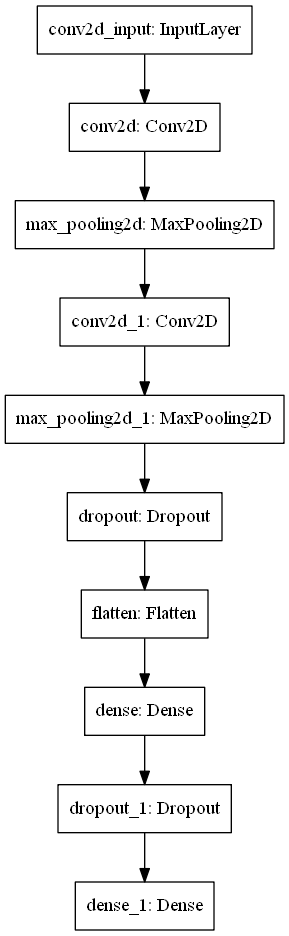

In [5]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

### Model Training

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer="adam",
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))

Epoch 1/15
469/469 [==============================] - 8s 16ms/step - loss: 0.8733 - accuracy: 0.7047 - val_loss: 0.1563 - val_accuracy: 0.9559
Epoch 2/15
469/469 [==============================] - 8s 17ms/step - loss: 0.3861 - accuracy: 0.8770 - val_loss: 0.0999 - val_accuracy: 0.9689
Epoch 3/15
469/469 [==============================] - 8s 18ms/step - loss: 0.3143 - accuracy: 0.8997 - val_loss: 0.0889 - val_accuracy: 0.9720
Epoch 4/15
469/469 [==============================] - 7s 16ms/step - loss: 0.2694 - accuracy: 0.9162 - val_loss: 0.0754 - val_accuracy: 0.9749
Epoch 5/15
469/469 [==============================] - 8s 17ms/step - loss: 0.2472 - accuracy: 0.9231 - val_loss: 0.0663 - val_accuracy: 0.9781
Epoch 6/15
469/469 [==============================] - 8s 18ms/step - loss: 0.2286 - accuracy: 0.9280 - val_loss: 0.0599 - val_accuracy: 0.9806
Epoch 7/15
469/469 [==============================] - 7s 16ms/step - loss: 0.2178 - accuracy: 0.9312 - val_loss: 0.0559 - val_accuracy: 0.9820

### Testing

In [ ]:
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

### Prediction

In [ ]:
import pylab as plt
n=122                                            #Choose any number for testing case
plt.imshow(x_test[n].reshape(28,28),cmap='gray')
plt.show()

In [ ]:
import numpy as np
prediction = model.predict(x_test[n:n+1])
print('Prediction Score:\n',prediction[0])
thresholded = (prediction>0.5)*1
print('\nThresholded Score:\n',thresholded[0])
print('\nPredicted Digit:\n',np.where(thresholded == 1)[1][0])


## Custom Prediction

In [ ]:
# costum digits drawn in paint application
import matplotlib.cm as cm
import cv2
img = cv2.imread('9.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

plt.imshow(img,cmap=cm.gray)

In [ ]:
img = img.reshape(1,28,28,1)
import numpy as np
prediction = model.predict(img)
#print('Prediction Score:\n',prediction[0])
thresholded = (prediction>0.5)*1
print('\nThresholded Score:\n',thresholded[0])
print('\nPredicted Digit:\n',np.where(thresholded == 1)[1][0])

In [ ]:
# testing on photos from google images

import matplotlib.cm as cm
import cv2
img = cv2.imread('test_3.jpg')

img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)    

plt.imshow(img,cmap=cm.gray)

In [ ]:
img1 = cv2.resize(img,(28,28))
img1 = 255-img1
plt.imshow(img1,cmap=cm.gray)

In [ ]:
img1 = img1.reshape(1,28,28,1)
import numpy as np
prediction = model.predict(img1)
#print('Prediction Score:\n',prediction[0])
thresholded = (prediction>0.5)*1
#print('\nThresholded Score:\n',thresholded[0])
print('\nPredicted Digit:\n',np.where(thresholded == 1)[1][0])
